In [27]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import random
style.use('fivethirtyeight')

### Creating our own KNN algorithm

In [6]:
dataset = {'k': [[1,2], [2,3], [3,1]], 'r': [[6,5], [7,7], [8,6]]}
new_features = [5,7]

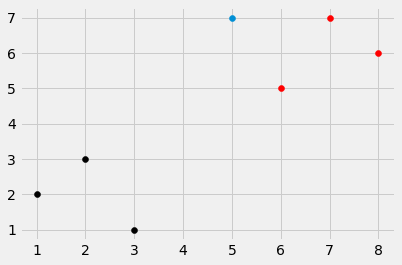

In [22]:
[[plt.scatter(ii[0],ii[1], color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(*new_features)
plt.show()

In [50]:
def k_nearest_neighbors(data, predict, k=3):
    if k <= len(data):
        warnings.warn('K is set to a value less than total classes!')
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_distance = sqrt( (features[0] - predict[0])**2 + (feature[1]-predict[1])**2)
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict)) #eucd using numpy
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

In [20]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[('r', 3)]
r


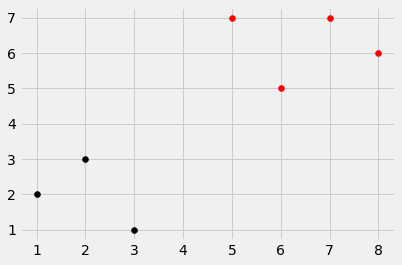

In [23]:
[[plt.scatter(ii[0],ii[1], color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(*new_features, color = result)
plt.show()

### Testing Our KNN algorithm

In [30]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?', -99999, inplace = True)
df.drop(['id'],1, inplace=True)

In [35]:
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

In [58]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1]) #at -1 i.e. the last column is the class

for i in test_data:
    test_set[i[-1]].append(i[:-1]) 

In [59]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct +=1
        else:
            print(confidence)
        total +=1
print('Accuracy: ', correct/total)

1.0
0.6
0.6
0.6
0.6
Accuracy:  0.9640287769784173
